# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process

df = pd.read_excel("D:\Programming\CAT_DS_Tasks\Candy Task\candyhierarchy2017.xlsx")

C:\Users\saadd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [51]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [52]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy worth eating.,White and gold,NaN,

<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [53]:

# Check for missing values
df.isnull().sum()

Internal ID                                                                                  0
Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                          

In [54]:
# check for duplicates by Internal ID
df.duplicated(subset="Internal ID").sum()

0

In [55]:
df.dtypes

Internal ID                                                                                 int64
Q1: GOING OUT?                                                                             object
Q2: GENDER                                                                                 object
Q3: AGE                                                                                    object
Q4: COUNTRY                                                                                object
Q5: STATE, PROVINCE, COUNTY, ETC                                                           object
Q6 | 100 Grand Bar                                                                         object
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     object
Q6 | Any full-sized candy bar                                                              object
Q6 | Black Jacks                                                                           object
Q6 | Bonkers (the ca

# 3- write summary about what you get form the above functions
### There is no duplicates. However, there is a lot of missing values that need to clean. Also some of bad dtypes

We need to:
1) drop all metadata and useless columns
2) impute all missing values
3) change dtypes to to correct one

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [56]:
df = df.drop(columns=["Q7: JOY OTHER", "Q8: DESPAIR OTHER",\
                       "Q9: OTHER COMMENTS", "Internal ID", "Unnamed: 113", "Click Coordinates (x, y)"], axis=1)


In [57]:
# Rename columns
df.rename(columns={"Q1: GOING OUT?": "going out", "Q2: GENDER": "Gender", "Q3: AGE": "Age", "Q4: COUNTRY": "Country",\
                     "Q5: STATE, PROVINCE, COUNTY, ETC": "State",\
                        "Q10: DRESS": "Dress", "Q11: DAY": "Day",\
                           "Q12: MEDIA [Daily Dish]": "daily_dish", "Q12: MEDIA [Science]": "science",\
                              "Q12: MEDIA [ESPN]": "espn", "Q12: MEDIA [Yahoo]": "yahoo"}, inplace=True)

In [58]:
df.dtypes

going out                                                                                  object
Gender                                                                                     object
Age                                                                                        object
Country                                                                                    object
State                                                                                      object
Q6 | 100 Grand Bar                                                                         object
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     object
Q6 | Any full-sized candy bar                                                              object
Q6 | Black Jacks                                                                           object
Q6 | Bonkers (the candy)                                                                   object
Q6 | Bonkers (the bo

In [59]:
df.describe(include="all")

,going out,Gender,Age,Country,State,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Dress,Day,daily_dish,science,espn,yahoo
count,2350,2419,2376.0,2396,2360,1713,1726,1788,1502,1468,1454,1695,1772,1754,1778,1777,1782,1769,1708,1780,1717,1514,1749,1607,1756,1768,1731,1758,1637,1729,1763,1581,1726,1744,1763,1765,1766,1748,1787,1788,1782,1747,1766,1765,1434,1762,1518,1716,1515,1786,1724,1730,1774,1775,1742,1769,1735,1436,1731,1767,1772,1785,1789,1733,1731,1696,1647,1518,1736,1684,1649,1720,1716,1737,1762,1643,1750,1751,1738,1707,1781,1769,1446,1746,1684,1754,1735,1559,1770,1722,1578,1767,1752,1745,1458,1543,1746,1724,1752,1754,1752,1770,1668,1671,1637,1703,1713,1755,1716,1735,85.0,1362.0,99.0,67.0
unique,2,4,106.0,128,511,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,NaN,NaN,NaN,NaN
top,No,Male,40.0,USA,California,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,JOY,MEH,JOY,MEH,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,DESPAIR,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,NaN,NaN,NaN
fre

### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [60]:
df["going out"].isnull().sum()

110

In [61]:
df["going out"].fillna("Maybe", inplace=True)
print(df["going out"].isnull().sum())
df["going out"].value_counts()

0


going out
No       2038
Yes       312
Maybe     110
Name: count, dtype: int64

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [62]:
df["Gender"].unique()
df["Gender"].fillna("I'd rather not say", inplace=True)
df["Gender"].value_counts()

Gender
Male                  1467
Female                 839
I'd rather not say     124
Other                   30
Name: count, dtype: int64

In [63]:
df["Gender"].replace("Other", "No Answer", inplace=True)
df["Gender"].replace("I'd rather not say", "No Answer", inplace=True)

In [64]:
df["Gender"].value_counts()

Gender
Male         1467
Female        839
No Answer     154
Name: count, dtype: int64

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [65]:
df["Age"].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [66]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age"].unique()

array([   nan,   44. ,   49. ,   40. ,   23. ,   53. ,   33. ,   43. ,
         56. ,   64. ,   37. ,   59. ,   48. ,   54. ,   36. ,   45. ,
         25. ,   34. ,   35. ,   38. ,   58. ,   50. ,   47. ,   16. ,
         52. ,   63. ,   65. ,   41. ,   27. ,   31. ,   61. ,   46. ,
         42. ,   62. ,   29. ,   39. ,   32. ,   28. ,   69. ,   67. ,
         30. ,   22. ,   26. ,   51. ,   70. ,   24. ,   18. ,   19. ,
         57. ,   60. ,   66. ,   12. ,   55. ,   72. ,   21. ,   11. ,
          9. ,   68. ,   20. ,    6. ,   10. ,   71. ,   90. ,   13. ,
        312. ,   99. ,    7. ,   88. ,   39.4,   74. ,  102. ,   17. ,
         15. ,    8. ,   75. ,   14. ,  100. ,   76. , 1000. ,   77. ,
         73. ,   70.5,    1. ,    4. ])

<Axes: xlabel='Age'>

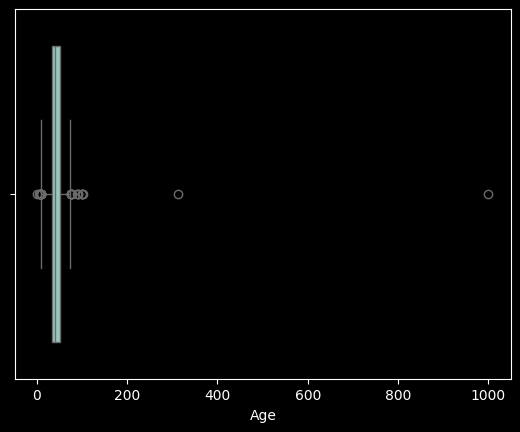

In [67]:
sns.boxplot(x = df["Age"])

In [68]:
# detect outliers using IQR and replace them with nan
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = (df["Age"] < lower_limit) | (df["Age"] > upper_limit)
df.loc[outliers, "Age"] = np.nan


<Axes: xlabel='Age'>

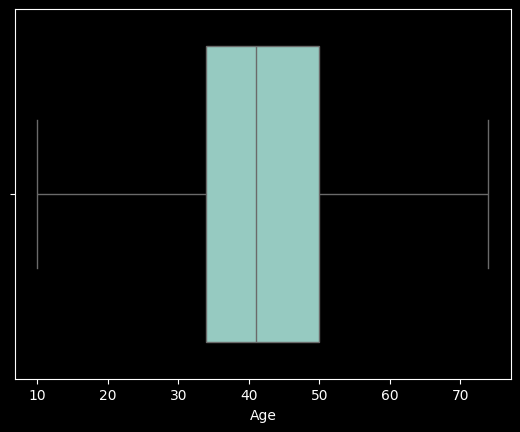

In [69]:
sns.boxplot(x = df["Age"])

<Axes: xlabel='Age'>

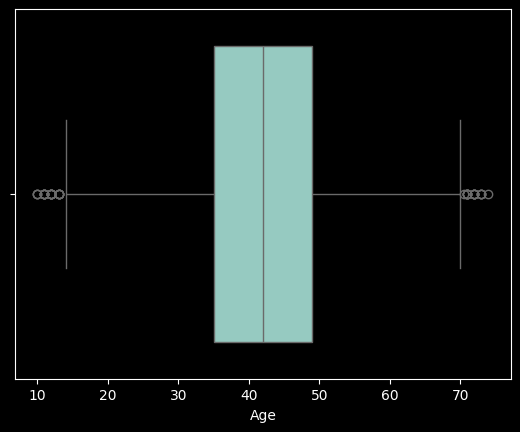

In [70]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
sns.boxplot(x = df["Age"])

In [71]:
df["Age"].isnull().any()

False

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [72]:
print("Number of unique categories:",len(df['Country'].unique()))
print("Number of Null Values:", df["Country"].isnull().sum())

Number of unique categories: 129
Number of Null Values: 64


In [73]:
print(df["Country"].value_counts())

Country
USA                                                                     699
United States                                                           497
usa                                                                     217
Canada                                                                  179
Usa                                                                     139
US                                                                      126
USA                                                                      73
United States of America                                                 57
us                                                                       40
united states                                                            38
United States                                                            37
canada                                                                   34
United states                                                            19
Us  

In [74]:
# lOWER CASE
df["Country"] = df["Country"].str.lower()
print("Number of unique categories:",len(df['Country'].unique()))
df["Country"].value_counts()


Number of unique categories: 100


Country
usa                                                                     1056
united states                                                            554
canada                                                                   215
us                                                                       182
usa                                                                       74
united states of america                                                  62
united states                                                             38
uk                                                                        17
united kingdom                                                            14
u.s.                                                                      11
united states of america                                                  11
germany                                                                   10
canada                                                              

In [76]:
# trailing white spaces
df["Country"] = df["Country"].str.strip()
print("Number of unique categories:",len(df['Country'].unique()))
df["Country"].unique()


Number of unique categories: 91


array([nan, 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'new jersey',

[nan, 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'new jersey',
       'indonesia', 'united ststes', 'the netherlands', 'united statss',
       'endland', 'atlantis', 'murrika', 'usa! usa! usa!', 'usaa',
       'alaska', 'soviet canuckistan', 'n. america', 'singapore', 'ussa',
       'china', 'taiwan', 'hong kong', 'spain', 'sweden', 'narnia',
       'u s a', 'united statea', 'subscribe to dm4uz3 on youtube',
       'usa usa usa!!!!', "i don't know anymore", 'fear and loathing']

In [84]:
usa_matches = process.extract('usa', df['Country'].unique(), limit= len(df.Country.unique()))
for usa_match in usa_matches:
    if usa_match[1] > 60:
        df["Country"].replace(usa_match[0], "usa", inplace=True)

In [86]:
correct_countries = ['usa','united states', 'canada', 'united kingdom', 'uae', 'england','uk', 'mexico',
                      'america', 'france', 'finland', 'netherlands', 'germany',
                        'australia', 'greece', 'ireland', 'korea', 'japan', 'south africa',
                          'iceland', 'scotland', 'denmark', 'switzerland', 'south korea',
                            'indonesia', 'china', 'taiwan', 'hong kong', 'spain', 'sweden',
                              'singapore', 'costa rica']

# Find close matches
for country in correct_countries:
    matches = process.extract(country, df['Country'].unique(), limit=df.shape[0])
    for match in matches:
        if match[1] > 80:
            df["Country"].replace(match[0], country, inplace=True)

print("Number of unique categories:",len(df['Country'].unique()))
df["Country"].unique()

Number of unique categories: 53


array([nan, 'usa', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'england', 'mexico', 'america', 'france',
       'finland', 'north carolina', 'netherlands', 'germany', 'europe',
       'earth', 'u.k.', 'costa rica', 'cascadia', 'australia',
       'insanity lately', 'greece', 'usa? hard to tell anymore..',
       'pittsburgh', 'canae', 'new york', 'trumpistan', 'iceland',
       'south korea', 'california', 'japan', 'south africa', 'scotland',
       'denmark', 'switzerland', 'ud', 'new jersey', 'indonesia',
       'atlantis', 'murrika', 'alaska', 'soviet canuckistan', 'singapore',
       'china', 'taiwan', 'hong kong', 'spain', 'sweden', 'narnia',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [88]:
mapping = {'united states': 'usa','america': 'usa', 'england': 'uk', 'united kingdom': 'uk', 'u.k.': 'uk', 'south korea': 'korea'}
df["Country"].replace(mapping, inplace=True)
print("Number of unique categories:",len(df['Country'].unique()))
df["Country"].unique()

Number of unique categories: 48


array([nan, 'usa', 'canada', 'murica', 'uk', 'mexico', 'france',
       'finland', 'north carolina', 'netherlands', 'germany', 'europe',
       'earth', 'costa rica', 'cascadia', 'australia', 'insanity lately',
       'greece', 'usa? hard to tell anymore..', 'pittsburgh', 'canae',
       'new york', 'trumpistan', 'iceland', 'korea', 'california',
       'japan', 'south africa', 'scotland', 'denmark', 'switzerland',
       'ud', 'new jersey', 'indonesia', 'atlantis', 'murrika', 'alaska',
       'soviet canuckistan', 'singapore', 'china', 'taiwan', 'hong kong',
       'spain', 'sweden', 'narnia', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

<!-- Country
usa                                                                     1130
united states                                                            592
canada                                                                   224
us                                                                       182
united states of america                                                  73
uk                                                                        18
united kingdom                                                            14
u.s.                                                                      12
germany                                                                   10
u.s.a.                                                                     8
australia                                                                  7
america                                                                    6
netherlands                                                                6
japan                                                                      5
scotland                                                                   5
mexico                                                                     4
us of a                                                                    4
unites states                                                              4
ireland                                                                    4
france                                                                     3
switzerland                                                                3
united state                                                               2
united ststes                                                              2
china                                                                      2
united stated                                                              2
hong kong                                                                  2
denmark                                                                    2
the united states                                                          2
sweden                                                                     2
i don't know anymore                                                       1
united statss                                                              1
ahem....amerca                                                             1
ud                                                                         1
south korea                                                                1
usa usa usa!!!!                                                            1
new jersey                                                                 1
indonesia                                                                  1
the netherlands                                                            1
usa! usa! usa!                                                             1
endland                                                                    1
atlantis                                                                   1
murrika                                                                    1
narnia                                                                     1
subscribe to dm4uz3 on youtube                                             1
usaa                                                                       1
alaska                                                                     1
soviet canuckistan                                                         1
n. america                                                                 1
singapore                                                                  1
united statea                                                              1
canada`                                                                    1
taiwan                                                                     1
u s a                                                                      1
spain                                                                      1
ussa                                                                       1
new york                                                                   1
iceland                                                                    1
north carolina                                                             1
costa rica                                                                 1
u.k.                                                                       1
u s                                                                        1
earth                                                                      1
europe                                                                     1
unied states                                                               1
unhinged states                                                            1
i pretend to be from canada, but i am really from the united states.       1
finland                                                                    1
usausausa                                                                  1
england                                                                    1
uae                                                                        1
united staes                                                               1
murica                                                                     1
the united states of america                                               1
unite states                                                               1
cascadia                                                                   1
insanity lately                                                            1
greece                                                                     1
usa? hard to tell anymore..                                                1
'merica                                                                    1
usas                                                                       1
pittsburgh                                                                 1
a                                                                          1
can                                                                        1
canae                                                                      1
trumpistan                                                                 1
united sates                                                               1
korea                                                                      1
california                                                                 1
south africa                                                               1
fear and loathing                                                          1
Name: count, dtype: int64 -->

In [92]:
df.value_counts('Country') / df.shape[0] * 100

Country
usa                               79.918699
canada                             9.186992
uk                                 4.471545
germany                            0.406504
netherlands                        0.284553
australia                          0.284553
scotland                           0.203252
japan                              0.203252
iceland                            0.203252
mexico                             0.162602
switzerland                        0.121951
france                             0.121951
sweden                             0.081301
hong kong                          0.081301
china                              0.081301
denmark                            0.081301
korea                              0.081301
spain                              0.040650
soviet canuckistan                 0.040650
taiwan                             0.040650
subscribe to dm4uz3 on youtube     0.040650
singapore                          0.040650
trumpistan              

In [94]:
last_countries = ['usa', 'canada', 'uk', 'germany', 'netherlands',
                   'australia', 'scotland', 'japan', 'iceland',
                     'mexico', 'switzerland', 'france', 'sweden',
                       'hong kong', 'china', 'denmark', 'korea']

df["Country"] = df["Country"].apply(lambda x: x if x in last_countries else "other")
print("Number of unique categories:",len(df['Country'].unique()))
df["Country"].unique()

Number of unique categories: 18


array(['other', 'usa', 'canada', 'uk', 'mexico', 'france', 'netherlands',
       'germany', 'australia', 'iceland', 'korea', 'japan', 'scotland',
       'denmark', 'switzerland', 'china', 'hong kong', 'sweden'],
      dtype=object)

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [95]:
df["State"].unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox cou

In [96]:
# There are a lot of missing values and unique values in the State column, so I will drop it
df.drop(columns="State", axis=1, inplace=True)

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [97]:
for col in df.columns:
    if col.startswith("Q6"):
        print(df[col].unique())
        print(df[col].isnull().sum())

[nan 'MEH' 'JOY' 'DESPAIR']
747
[nan 'DESPAIR' 'MEH' 'JOY']
734
[nan 'JOY' 'MEH' 'DESPAIR']
672
[nan 'MEH' 'DESPAIR' 'JOY']
958
[nan 'DESPAIR' 'MEH' 'JOY']
992
[nan 'DESPAIR' 'MEH' 'JOY']
1006
[nan 'DESPAIR' 'MEH' 'JOY']
765
[nan 'DESPAIR' 'MEH' 'JOY']
688
[nan 'DESPAIR' 'JOY' 'MEH']
706
[nan 'DESPAIR' 'MEH' 'JOY']
682
[nan 'MEH' 'DESPAIR' 'JOY']
683
[nan 'MEH' 'DESPAIR' 'JOY']
678
[nan 'DESPAIR' 'MEH' 'JOY']
691
[nan 'MEH' 'JOY' 'DESPAIR']
752
[nan 'JOY' 'MEH' 'DESPAIR']
680
[nan 'MEH' 'JOY' 'DESPAIR']
743
[nan 'DESPAIR' 'JOY' 'MEH']
946
[nan 'DESPAIR' 'MEH' 'JOY']
711
[nan 'DESPAIR' 'MEH' 'JOY']
853
[nan 'DESPAIR' 'JOY' 'MEH']
704
[nan 'DESPAIR' 'MEH' 'JOY']
692
[nan 'MEH' 'JOY' 'DESPAIR']
729
[nan 'JOY' 'MEH' 'DESPAIR']
702
[nan 'DESPAIR' 'MEH' 'JOY']
823
[nan 'DESPAIR' 'MEH' 'JOY']
731
[nan 'DESPAIR' 'JOY' 'MEH']
697
[nan 'DESPAIR' 'JOY' 'MEH']
879
[nan 'MEH' 'DESPAIR' 'JOY']
734
[nan 'DESPAIR' 'MEH' 'JOY']
716
[nan 'MEH' 'JOY' 'DESPAIR']
697
[nan 'MEH' 'DESPAIR' 'JOY']
695
[nan 'D

In [98]:
for col in df.columns:
    if col.startswith("Q6"):
        df[col].fillna("Other", inplace=True)

In [99]:
for col in df.columns:
    if col.startswith("Q6"):
        print(df[col].unique())
        print(df[col].isnull().sum())

['Other' 'MEH' 'JOY' 'DESPAIR']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'JOY' 'MEH' 'DESPAIR']
0
['Other' 'MEH' 'DESPAIR' 'JOY']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'DESPAIR' 'JOY' 'MEH']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'MEH' 'DESPAIR' 'JOY']
0
['Other' 'MEH' 'DESPAIR' 'JOY']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'MEH' 'JOY' 'DESPAIR']
0
['Other' 'JOY' 'MEH' 'DESPAIR']
0
['Other' 'MEH' 'JOY' 'DESPAIR']
0
['Other' 'DESPAIR' 'JOY' 'MEH']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'DESPAIR' 'JOY' 'MEH']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'MEH' 'JOY' 'DESPAIR']
0
['Other' 'JOY' 'MEH' 'DESPAIR']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'DESPAIR' 'JOY' 'MEH']
0
['Other' 'DESPAIR' 'JOY' 'MEH']
0
['Other' 'MEH' 'DESPAIR' 'JOY']
0
['Other' 'DESPAIR' 'MEH' 'JOY']
0
['Other' 'MEH'

In [100]:
# Rename columns
for col in df.columns:
    if col.startswith("Q6"):
        df.rename(columns={col: col[5:]}, inplace=True)

In [101]:
df.columns

Index(['going out', 'Gender', 'Age', 'Country', '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       'Bonkers (the board game)',
       ...
       'Whatchamacallit Bars', 'White Bread', 'Whole Wheat anything',
       'York Peppermint Patties', 'Dress', 'Day', 'daily_dish', 'science',
       'espn', 'yahoo'],
      dtype='object', length=113)

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [102]:
df["Dress"].unique()   

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [103]:
df["Dress"].fillna("Other", inplace=True)

In [104]:
df["Dress"].unique()    

array(['Other', 'White and gold', 'Blue and black'], dtype=object)

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [105]:
df["Day"].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [106]:
df["Day"].fillna("Other", inplace=True)

In [107]:
df["Day"].unique()

array(['Other', 'Sunday', 'Friday'], dtype=object)

### 12 - clean ` the Last 4 cols` column


In [108]:
# check for missing values for last 4 columns
df.iloc[:, -4:].isnull().sum()

daily_dish    2375
science       1098
espn          2361
yahoo         2393
dtype: int64

In [109]:
print(df["daily_dish"].unique())
print(df["science"].unique())
print(df["espn"].unique())
print(df["yahoo"].unique())

[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]


In [110]:
df["daily_dish"].fillna("0", inplace=True)
df["science"].fillna("0", inplace=True)
df["espn"].fillna("0", inplace=True)
df["yahoo"].fillna("0", inplace=True)
df["daily_dish"] = pd.to_numeric(df["daily_dish"], errors="coerce")
df["science"] = pd.to_numeric(df["science"], errors="coerce")
df["espn"] = pd.to_numeric(df["espn"], errors="coerce")
df["yahoo"] = pd.to_numeric(df["yahoo"], errors="coerce")

C:\Users\saadd\AppData\Local\Temp\ipykernel_30280\1306203257.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["daily_dish"].fillna("0", inplace=True)
C:\Users\saadd\AppData\Local\Temp\ipykernel_30280\1306203257.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["science"].fillna("0", inplace=True)
C:\Users\saadd\AppData\Local\Temp\ipykernel_30280\1306203257.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["espn"].fillna("0", inplace=True)
C:\Users\saadd\AppData\Local\Temp\ipykernel

In [111]:
print(df["daily_dish"].unique())
print(df["science"].unique())
print(df["espn"].unique())
print(df["yahoo"].unique())


[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]


### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

In [112]:
df.dtypes

going out                                                                             object
Gender                                                                                object
Age                                                                                  float64
Country                                                                               object
100 Grand Bar                                                                         object
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     object
Any full-sized candy bar                                                              object
Black Jacks                                                                           object
Bonkers (the candy)                                                                   object
Bonkers (the board game)                                                              object
Bottle Caps                                                           

In [113]:
df.isnull().sum()

going out                                                                            0
Gender                                                                               0
Age                                                                                  0
Country                                                                              0
100 Grand Bar                                                                        0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    0
Any full-sized candy bar                                                             0
Black Jacks                                                                          0
Bonkers (the candy)                                                                  0
Bonkers (the board game)                                                             0
Bottle Caps                                                                          0
Box'o'Raisins                              

### Plot TOP 10 most Joy and Despair Chocolates


In [114]:
chocolate = df.describe(include="O").iloc[2:4, 4:-2]
chocolate = chocolate.T

In [115]:
# select top joy and despair
top_joy = chocolate.sort_values(by="freq", ascending=False)
top_joy = top_joy.loc[top_joy["top"] == "JOY"].head(10)

top_despair = chocolate.sort_values(by="freq", ascending=False)
top_despair = top_despair.loc[top_despair["top"] == "DESPAIR"].head(10)

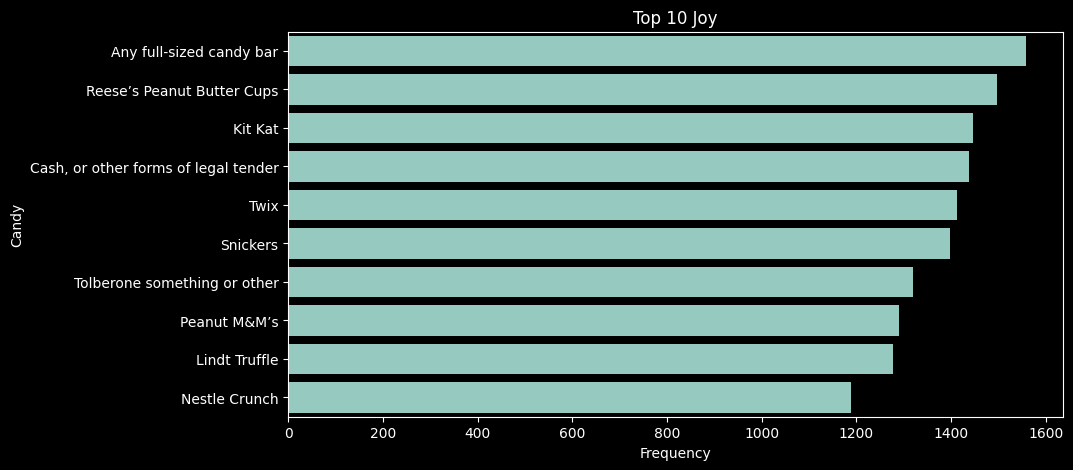

In [116]:
# plot top joy
plt.figure(figsize=(10, 5))
sns.barplot(x=top_joy["freq"], y=top_joy.index)
plt.title("Top 10 Joy")
plt.xlabel("Frequency")
plt.ylabel("Candy")
plt.show()

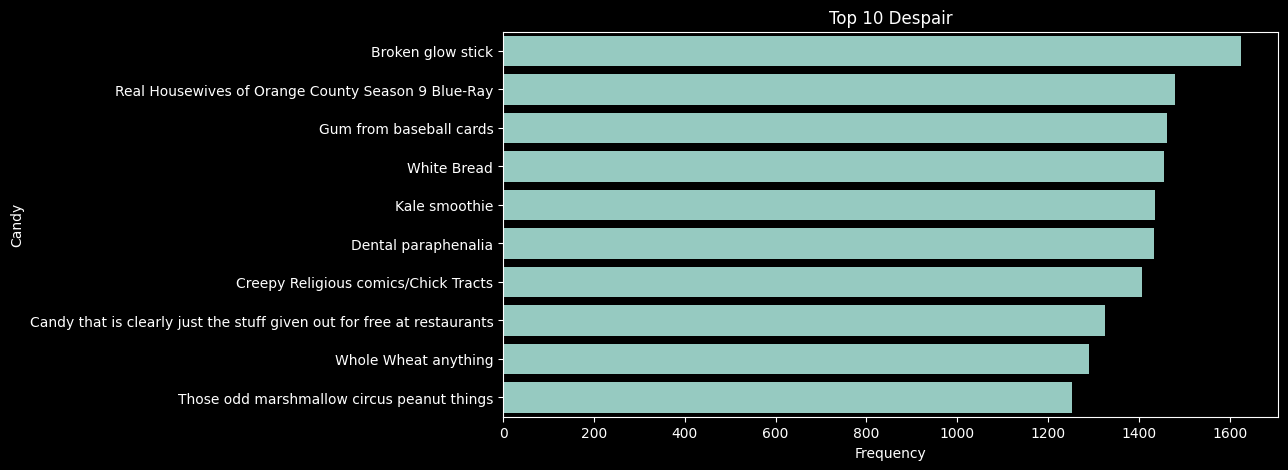

In [117]:
# plot top despair
plt.figure(figsize=(10, 5))
sns.barplot(x=top_despair["freq"], y=top_despair.index)
plt.title("Top 10 Despair")
plt.xlabel("Frequency")
plt.ylabel("Candy")
plt.show()

### 14 - write a summary about all the cleaning steps 

1. we checked for missing values and duplicates
2. we dropped columns that are not useful for our analysis
3. we renamed columns to be more readable
4. we cleaned the going out column by filling missing values with "Maybe"
5. we cleaned gender column by filling missing values with "Answer" 
6. we cleaned age column by replacing outliers with nan and then filling missing values with the mean
7. we cleaned country column by converting all values to lower case, removing trailing white spaces, and replacing close matches with the correct country name
8. we cleaned the state column by dropping it
9. we cleaned the candy columns by filling missing values with "Other"
10. we cleaned the dress and day columns by filling missing values with "Other"
11. we cleaned the last 4 columns by filling missing values with "0" and converting them to numeric
12. finally, we checked for missing values and duplicates again and then we created a summary about the top joy and despair candies